In [24]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
# Download dataset
## From the DAAG R package: "The possum data frame consists of nine morphometric 
## measurements on each of 104 mountain brushtail possums, 
## trapped at seven sites from Southern Victoria to central Queensland."
data =  pd.read_csv("possum.csv")

In [5]:
## base info
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [8]:
print(data.columns) 
print(data.dtypes)

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')
case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object


In [9]:
print(data.describe())

             case        site         age     hdlngth      skullw    totlngth  \
count  104.000000  104.000000  102.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    3.833333   92.602885   56.883654   87.088462   
std     30.166206    2.349086    1.909244    3.573349    3.113426    4.310549   
min      1.000000    1.000000    1.000000   82.500000   50.000000   75.000000   
25%     26.750000    1.000000    2.250000   90.675000   54.975000   84.000000   
50%     52.500000    3.000000    3.000000   92.800000   56.350000   88.000000   
75%     78.250000    6.000000    5.000000   94.725000   58.100000   90.000000   
max    104.000000    7.000000    9.000000  103.100000   68.600000   96.500000   

            taill    footlgth    earconch         eye       chest       belly  
count  104.000000  103.000000  104.000000  104.000000  104.000000  104.000000  
mean    37.009615   68.459223   48.130769   15.046154   27.000000   32.586538  
std      1.959518    4.395306 

In [15]:
## категориальные признаки - не имеют численного представления; они могут иметь два уникальных значения (бинарные признаки)
categorical_cols = ['site', 'Pop', 'sex']
## Статистический анализ категориальных данных
## df['your_column'].value_counts() — вернет количество уникальных совпадений в определенной колонке.
for col in categorical_cols:
    print(data[col].value_counts())

site
1    33
7    18
2    13
5    13
6    13
3     7
4     7
Name: count, dtype: int64
Pop
other    58
Vic      46
Name: count, dtype: int64
sex
m    61
f    43
Name: count, dtype: int64


In [16]:
# Построение сводных таблиц
pivot_table_site_sex = data.pivot_table(index='site', columns='sex', aggfunc='size', fill_value=0)
print(pivot_table_site_sex)

sex    f   m
site        
1     19  14
2      5   8
3      3   4
4      2   5
5      6   7
6      4   9
7      4  14


In [17]:
## Процентное отношение записей по признаку 'sex'
## -> нормализированные данные
sex_percentages = data['sex'].value_counts(normalize=True) * 100
print(sex_percentages)

sex
m    58.653846
f    41.346154
Name: proportion, dtype: float64


In [33]:
# Сделаем выборку с помощью loc
sample_loc = data.loc[2:4, ['Pop', 'sex', 'age', 'hdlngth', 'skullw']]
print(sample_loc)

   Pop sex  age  hdlngth  skullw
2  Vic   f  6.0     94.0    60.0
3  Vic   f  6.0     93.2    57.1
4  Vic   f  2.0     91.5    56.3


In [32]:
# Сделаем выборку с помощью iloc
sample_iloc = data.iloc[0:4, 4:12]
print(sample_iloc)

   age  hdlngth  skullw  totlngth  taill  footlgth  earconch   eye
0  8.0     94.1    60.4      89.0   36.0      74.5      54.5  15.2
1  6.0     92.5    57.6      91.5   36.5      72.5      51.2  16.0
2  6.0     94.0    60.0      95.5   39.0      75.4      51.9  15.5
3  6.0     93.2    57.1      92.0   38.0      76.1      52.2  15.2


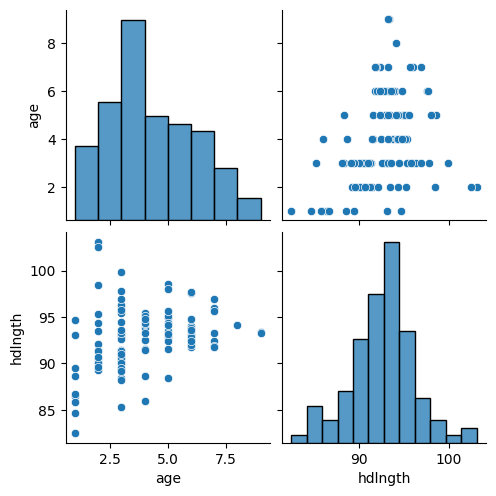

In [36]:
sns.pairplot(data[['age', 'hdlngth']])

<Axes: xlabel='Pop', ylabel='count'>

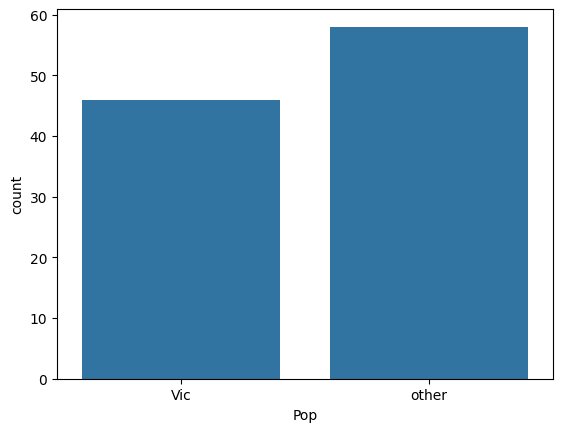

In [38]:
sns.countplot(data=data, x='Pop')